In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

# Importing the Dataset

In [299]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [300]:
df.shape

(4177, 9)

In [301]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [303]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [304]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Univaraint,Bivariant,Multivariant Analysis

<AxesSubplot:xlabel='Rings'>

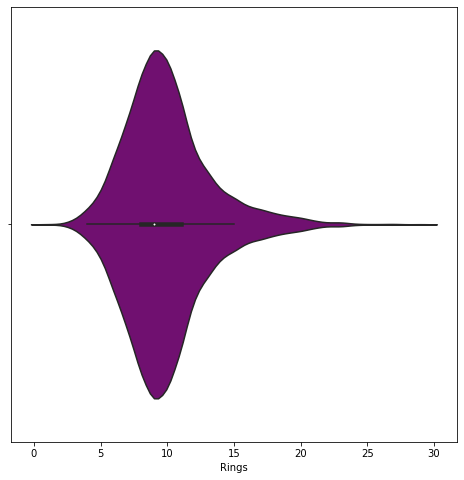

In [305]:
plt.figure(figsize=(8,8))
sns.violinplot(df["Rings"],color="purple")

From the above violin plot we can say that....the count for number of rings usually falls in the rang of 5-20. i.e most of the abalone are in the age of 5 to 20 that are present in our dataset.
5 the younger one 20 or 20+ being the elder one.

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

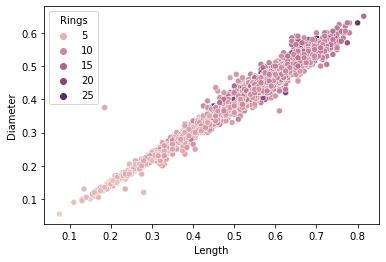

In [306]:
sns.scatterplot(x="Length",y="Diameter",data=df,hue="Rings")

With the above plot we can say that more the Length and Diameter of the abalone more the rings i.e more the age.

<AxesSubplot:xlabel='Length', ylabel='Density'>

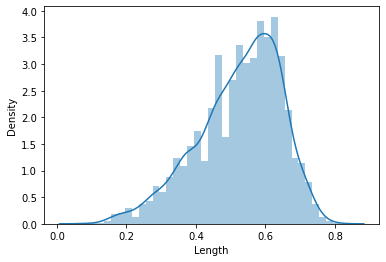

In [307]:
sns.distplot(df["Length"])

The above distribution plot says that, the length is slightly left skewed which shows the presence of outliers.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

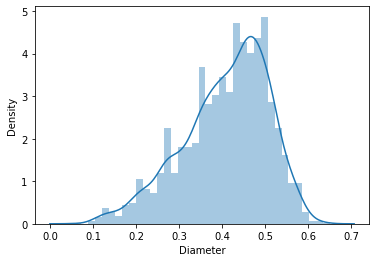

In [308]:
sns.distplot(df["Diameter"])

Similarly for diameter, the variable is slightly skewed.

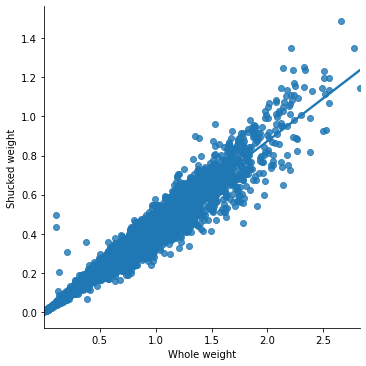

In [309]:
sns.lmplot(x="Whole weight",y="Shucked weight",data=df)

From the above plot, we can say that the whole weight and shucked weight are forming strong linear relationship.

<AxesSubplot:xlabel='Shucked weight', ylabel='Viscera weight'>

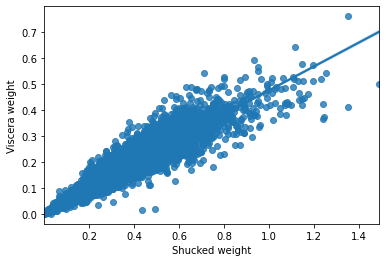

In [310]:
sns.regplot(x="Shucked weight",y="Viscera weight",data=df)

Shucked weight and Visceraweight are linearly propotional to each other.

<AxesSubplot:xlabel='Viscera weight', ylabel='Whole weight'>

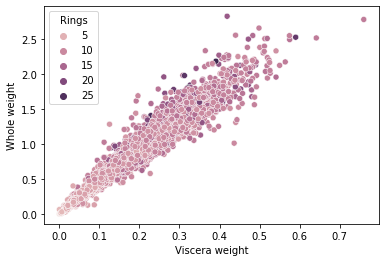

In [311]:
sns.scatterplot(x="Viscera weight",y="Whole weight",data=df,hue="Rings")

More the Viscera weight and whole weight more the rings i.e more the age of abalone.

<AxesSubplot:xlabel='Viscera weight', ylabel='Shell weight'>

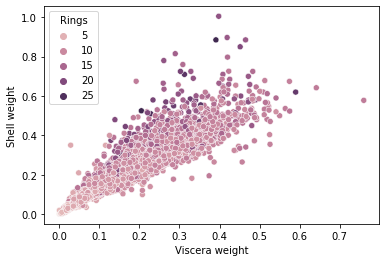

In [312]:
sns.scatterplot(x="Viscera weight",y="Shell weight",data=df,hue="Rings")

More the Viscera weight more the shell weight more the rings and more will be age of abalone.

Length               AxesSubplot(0.125,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Viscera weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

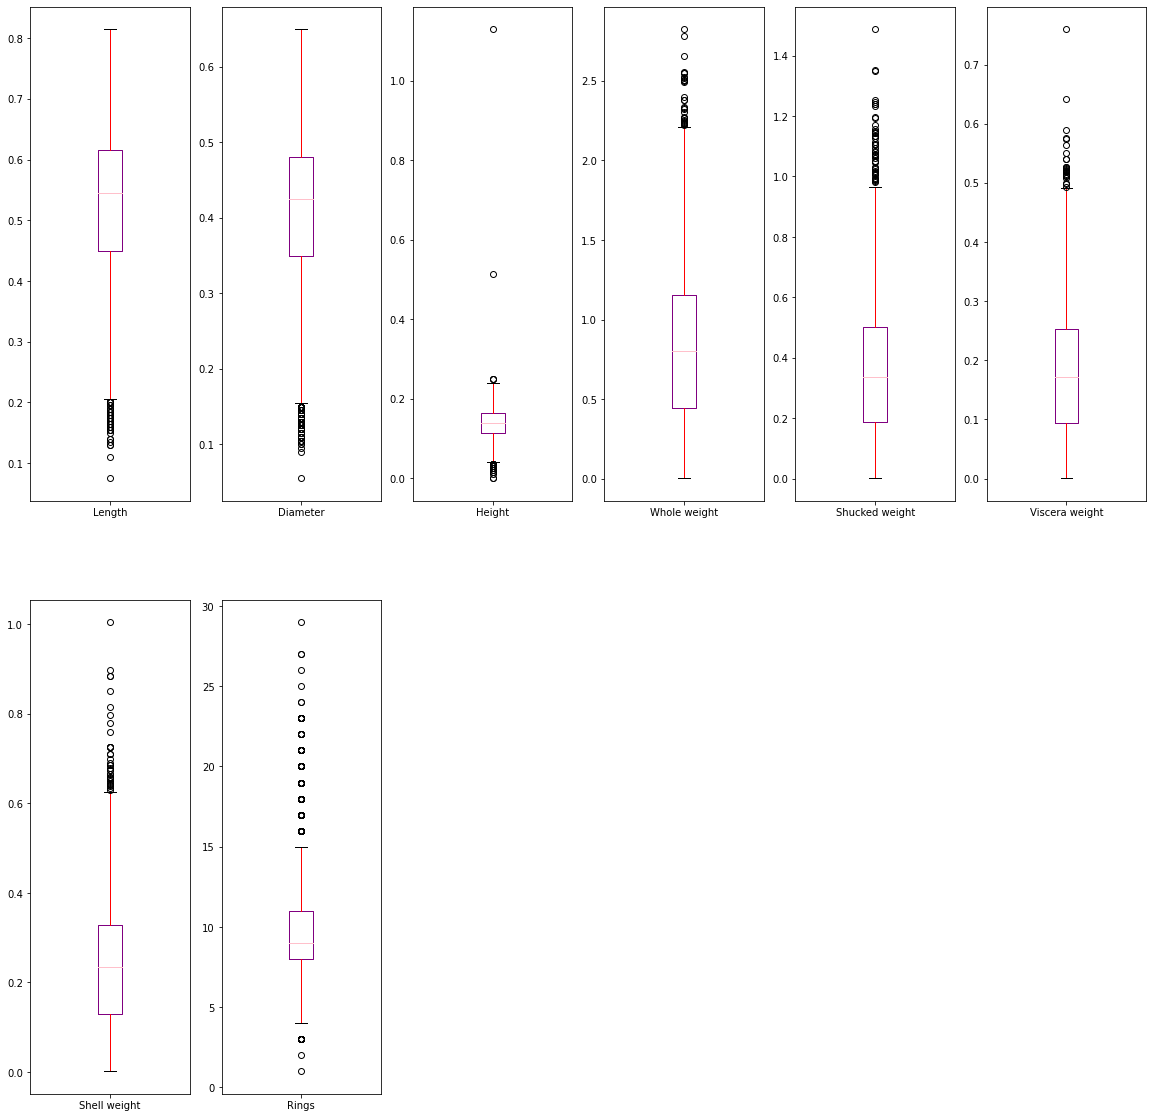

In [313]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,20),color=color)

The above boxplot says that there are few outliers present in the dataset and beacause of which the data is slightly skewed.

# Data Preprocessing/Cleaning

### Label Encoding

In [314]:
le=LabelEncoder()
li=["Sex"]
for val in li:
    df[val]=le.fit_transform(df[val].astype(str))

In [315]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


As the Sex variable is categorial type we need to convert it to numeric type so for that we performed label encoding.

<AxesSubplot:>

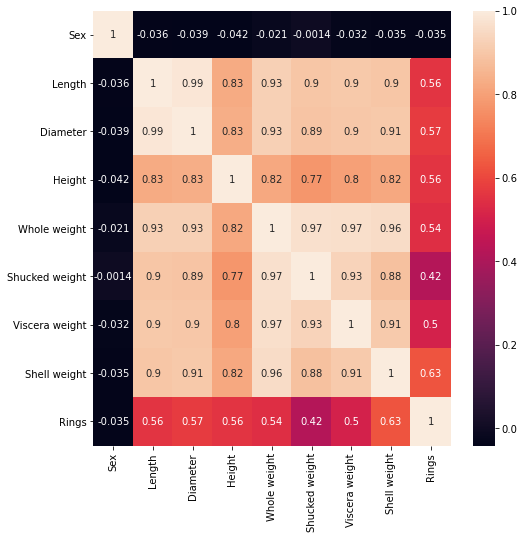

In [316]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [317]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above discription we can say that,
1.The mean is more that 50% percentile for whole weight and shucked weight there could be presence of skewness in data.
2.For height and shucked weight we can see that the gap between 75% and max is quite large so there could be presence of few outliers in these variables.


In [318]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Removing outliers

In [319]:
z=np.abs(zscore(df))
threshold=3
#print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [320]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

Here we can see that after removing outliers the skewness is also reduced.

# Dividing the dataset in x:independent and Y:dependent variable

In [321]:
x=df_new.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [322]:
y=df_new.iloc[:,-1]
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

# Variance Inflation Factor

In [323]:
def calc_vif(x):                #Variance Inflation Factor
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [324]:
calc_vif(x)

,variables,VIF FACTOR
0,Sex,2.586539
1,Length,711.017756
2,Diameter,762.862946
3,Height,92.050181
4,Whole weight,441.600560
5,Shucked weight,108.511496
6,Viscera weight,65.669278
7,Shell weight,94.849108


In [325]:
df_new.drop('Diameter',axis=1,inplace=True)

In [326]:
df_new.drop('Sex',axis=1,inplace=True)

In [328]:
df_new.drop('Shucked weight',axis=1,inplace=True)

As VIF Factor shows that there is presence of multicolinearities in length,diameter,shucked weight and whole weight.
we can drop Diameter as its VIF factor is highest and droping Sex variable as its contribution least in determining the number of rings.Shucked weight is also giving its least contribution in determining the number of rings are has multicolinearties also we can also drop that column.

In [329]:
x=df_new.iloc[:,0:-1]
x

,Length,Height,Whole weight,Viscera weight,Shell weight
0,0.455,0.095,0.5140,0.1010,0.1500
1,0.350,0.090,0.2255,0.0485,0.0700
2,0.530,0.135,0.6770,0.1415,0.2100
3,0.440,0.125,0.5160,0.1140,0.1550
4,0.330,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.2390,0.2490
4173,0.590,0.135,0.9660,0.2145,0.2605
4174,0.600,0.205,1.1760,0.2875,0.3080
4175,0.625,0.150,1.0945,0.2610,0.2960


In [330]:
calc_vif(x)

,variables,VIF FACTOR
0,Length,76.860935
1,Height,88.878283
2,Whole weight,132.553575
3,Viscera weight,60.830965
4,Shell weight,62.740076


In [331]:
df_new["Rings"]=df["Rings"].apply(lambda x:1 if  x>10 else 0)
df_new

,Length,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.455,0.095,0.5140,0.1010,0.1500,1
1,0.350,0.090,0.2255,0.0485,0.0700,0
2,0.530,0.135,0.6770,0.1415,0.2100,0
3,0.440,0.125,0.5160,0.1140,0.1550,0
4,0.330,0.080,0.2050,0.0395,0.0550,0
...,...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.2390,0.2490,1
4173,0.590,0.135,0.9660,0.2145,0.2605,0
4174,0.600,0.205,1.1760,0.2875,0.3080,0
4175,0.625,0.150,1.0945,0.2610,0.2960,0


In [332]:
x=df_new.iloc[:,0:-1]
x

,Length,Height,Whole weight,Viscera weight,Shell weight
0,0.455,0.095,0.5140,0.1010,0.1500
1,0.350,0.090,0.2255,0.0485,0.0700
2,0.530,0.135,0.6770,0.1415,0.2100
3,0.440,0.125,0.5160,0.1140,0.1550
4,0.330,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...
4172,0.565,0.165,0.8870,0.2390,0.2490
4173,0.590,0.135,0.9660,0.2145,0.2605
4174,0.600,0.205,1.1760,0.2875,0.3080
4175,0.625,0.150,1.0945,0.2610,0.2960


In [333]:
y=df_new.iloc[:,-1]
y

0       1
1       0
2       0
3       0
4       0
       ..
4172    1
4173    0
4174    0
4175    0
4176    1
Name: Rings, Length: 4027, dtype: int64

coverting the rings into binary classification i.e abalone havings rings more than 10 will be older ones and will be denoted by 1 and abalone having rings less than 10 will be denoted as younger one and will be labeled as 0

# Standard Scaling

In [334]:
mn=StandardScaler()
x=mn.fit_transform(x)
x

array([[-0.56936804, -1.16620737, -0.63315575, -0.72305677, -0.63065934],
       [-1.47535808, -1.30180583, -1.26564378, -1.23110406, -1.25603283],
       [ 0.07776771, -0.08141969, -0.27580549, -0.33113458, -0.16162923],
       ...,
       [ 0.68176107,  1.81695876,  0.81816861,  1.08172072,  0.60445329],
       [ 0.89747298,  0.32537569,  0.63949348,  0.82527781,  0.51064727],
       [ 1.63089349,  1.54576184,  2.51174574,  1.94298183,  2.06626381]])

As we could see that are the variables in our dataset are not scaled.....to bring them on same scale and to achieve best results we performed standard scaling.

In [335]:
x.shape

(4027, 5)

In [336]:
y.shape

(4027,)

# Performing Algorithms.

## Finding the best Random State

In [337]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.78 at random state 60


In [339]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=60)

# 1.Logistic Regression

In [380]:
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ac=accuracy_score(y_test1,pred)
print("accuracy score",ac*100)
clas=classification_report(y_test1,pred)
print(clas)

accuracy score 77.66749379652606
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       839
           1       0.67      0.52      0.59       370

    accuracy                           0.78      1209
   macro avg       0.74      0.71      0.72      1209
weighted avg       0.77      0.78      0.77      1209



# 2. Decision Tree Classifier.

In [379]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az*100)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 70.55417700578991
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       839
           1       0.52      0.57      0.54       370

    accuracy                           0.71      1209
   macro avg       0.66      0.67      0.66      1209
weighted avg       0.71      0.71      0.71      1209



# 3.Random Forest classifier.

In [382]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
we=accuracy_score(y_test1,pred)
print("Accuracy Score",we*100)
print(classification_report(y_test1,pred))

Accuracy Score 76.67493796526055
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       839
           1       0.62      0.61      0.61       370

    accuracy                           0.77      1209
   macro avg       0.73      0.72      0.72      1209
weighted avg       0.77      0.77      0.77      1209



# 4.KNeighborsClassifier

In [381]:
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
pred=knn.predict(x_test1)
aq=accuracy_score(y_test1,pred)
print("Accuracy Score",aq*100)
print(classification_report(y_test1,pred))

Accuracy Score 73.53184449958643
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       839
           1       0.57      0.54      0.56       370

    accuracy                           0.74      1209
   macro avg       0.69      0.68      0.68      1209
weighted avg       0.73      0.74      0.73      1209



# 5.AdaBoostClassifier

In [344]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 75.68
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       839
           1       0.64      0.48      0.54       370

    accuracy                           0.76      1209
   macro avg       0.71      0.68      0.69      1209
weighted avg       0.74      0.76      0.75      1209



# Cross Validation Techniques

In [368]:
r=cross_val_score(lm,x,y,cv=5).mean()
print(round(r,2))                         #Logistic Regression

0.75


In [370]:
s=cross_val_score(dtc,x,y,cv=5).mean()
print(round(s,2))                       #Decision Tree Classifier

0.68


In [371]:
r=cross_val_score(rf,x,y,cv=5).mean()
print(round(r,2))                      #Random Forest Classifier

0.74


In [372]:
e=cross_val_score(knn,x,y,cv=5).mean()
print(round(e,2))                        #KNN Classifier

0.73


In [373]:
y=cross_val_score(ad,x,y,cv=5).mean()
print(round(y,2))                       #Ada Boost Classifier

0.73


In [383]:
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
pred=knn.predict(x_test1)
qw=accuracy_score(y_test1,pred)
print("Accuracy Score",qw*100)
print(classification_report(y_test1,pred))

Accuracy Score 73.53184449958643
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       839
           1       0.57      0.54      0.56       370

    accuracy                           0.74      1209
   macro avg       0.69      0.68      0.68      1209
weighted avg       0.73      0.74      0.73      1209



# ROC_AUC CURVE

In [354]:
y_pred_prob=knn.predict_proba(x_test1)[:,1]
y_pred_prob

array([0. , 0.2, 0. , ..., 0.2, 0.8, 0.6])

In [355]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

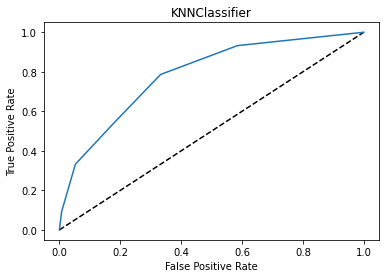

In [357]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNNClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNNClassifier")
plt.show()

In [384]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.7216538350030602

In the Above we can see that AUC_ROC curve as well as score which is almost equal to accuracy score.

# Hyperparameter Tuning

In [358]:
parameter={"weights":["uniform","distance"],
           "algorithm":["auto","ball_tree","kd_tree","brute"],
          "n_neighbors":np.arange(2,10),
          "p":np.arange(2,10)}

In [359]:
gcv=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [360]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [361]:
gcv.best_params_ 

{'algorithm': 'auto', 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

In [377]:
final=KNeighborsClassifier(n_neighbors=8,algorithm="auto",weights="distance",p=2)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.7419354838709677
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       839
           1       0.58      0.54      0.56       370

    accuracy                           0.74      1209
   macro avg       0.69      0.69      0.69      1209
weighted avg       0.74      0.74      0.74      1209

[[697 142]
 [170 200]]


# Saving the model

In [378]:
import joblib
joblib.dump(final,"final1.pkl")

['final1.pkl']